<a href="https://colab.research.google.com/github/sheemambabu/CMPE-258-Deep-Learning/blob/main/Assignment%203/HW_3_PartB_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE-258 Deep Learning
## Homework 3
### By,
### Sheema Murugesh Babu (SJSU-ID: 015217176)



Part b.3 ) Using pure pytorch linear modules etc.,. - high level primitives and build neural network.

# Using pure pytorch linear modules:

In [ ]:
import torch as tr
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.metrics import mean_squared_error

# Generating sample data: 

In [ ]:
n_samples = 200
input_dimensions = 3
output_dimensions = 2

tr.manual_seed(123)
X = tr.rand((n_samples, input_dimensions)).uniform_(-1,1)
print('Samples values of x:', X[:3])

weights_true = tr.tensor([[5., 1., -5.], [-1., -8., 1.]])
bias_true = tr.tensor([[1.], [1.]])

y_true = (-6 * X ** 2) @ weights_true.T + X @ weights_true.T + bias_true.T

print('Samples values of y:', y_true[:3])
print(f'X: {X.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

Samples values of x: tensor([[-0.6070, -0.8011,  0.2464],
        [ 0.1816,  0.9616,  0.9695],
        [ 0.4290,  0.5923,  0.4552]])
Samples values of y: tensor([[-17.1529,  40.9138],
        [ 19.6843,  33.0380],
        [  0.0512,  12.9870]])
X: torch.Size([200, 3]), weights: torch.Size([2, 3]), bias: torch.Size([2, 1]), y: torch.Size([200, 2])


# Function plot 3-D data with sklearn TSNE


In [ ]:
def plot_3d(title, X, y, y_pred=None):
  X_tsne = TSNE(n_components = 2, random_state=123).fit_transform(X)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y, label='y_true')
  ax.set_title(title)
  if y_pred is not None:
     ax.scatter(X_tsne[:, 0], X_tsne[:, 1], y_pred, label='y_pred', marker = '^')
  plt.legend()
  plt.show()

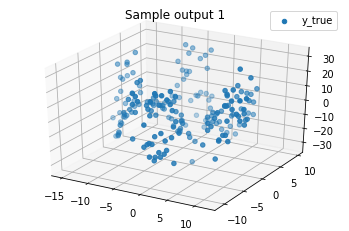

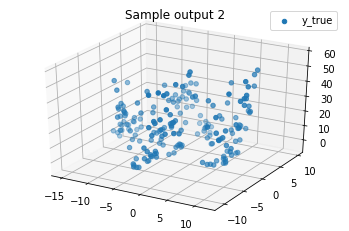

In [ ]:
plot_3d('Sample output 1', X, y_true[:,0])
plot_3d('Sample output 2', X, y_true[:,1])

# Building a neural network from scratch


In [ ]:
class NeuralNetwork_Model(nn.Module):
  def __init__(self, n_inputs=3, n_hidden=[2], n_outputs=2, activation_func=None):
    super(NeuralNetwork_Model, self).__init__()
    self.n_inputs = n_inputs
    self.n_hidden = n_hidden
    self.n_outputs = n_outputs

    node_layers = [self.n_inputs] + self.n_hidden + [self.n_outputs]
    
    layers = []
    for i in range(len(node_layers[:-1])):
      if i == len(node_layers[:-1]) - 1:
        layers.append(nn.Linear(node_layers[i], node_layers[i + 1]))
      else:
        layers.append(nn.Linear(node_layers[i], node_layers[i + 1]))
        if activation_func == 'relu':
          layers.append(nn.ReLU())

    self.layers = nn.ModuleList(layers)

  def forward(self, x):
    current_output = X
    for l in self.layers:
      current_output = l(current_output)
    return current_output
  
  # Training loop over number of epochs
  def fit(self, X, y_true, lr, epochs):
    loss_func = nn.MSELoss()
    optimizer = tr.optim.SGD(self.parameters(), lr=lr)
    for i in range(epochs):
      optimizer.zero_grad()

      y_pred = self.forward(X)
      error = loss_func(y_pred, y_true)
      print(error)
      error.backward()
      optimizer.step()

# Hyperparameters

In [ ]:
# Number of Iterations
epochs = 500

# Learning rate of the algorithm
lr = 0.03

# Input and output size. i.e 3 and 2 relatively
input = X.shape[1]
output = y_true.shape[1]

print(input)
print(output)

3
2


# Training the Neural Network model with ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func='relu')
print('Neural Network Architecture:')
print(model)

Neural Network Architecture:
NeuralNetwork_Model(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): ReLU()
    (4): Linear(in_features=3, out_features=2, bias=True)
  )
)


In [ ]:
for identifier, params in model.named_parameters():
  print(f"Layer: {identifier} | Size: {params.size()} | Values : {params[:2]} \n")

model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X).detach().numpy()
err = mean_squared_error(y_true, y_pred)
print('Final MSE with ReLU: {}'.format(err))

Layer: layers.0.weight | Size: torch.Size([4, 3]) | Values : tensor([[-0.3888,  0.0254,  0.2982],
        [ 0.3281, -0.4806, -0.0803]], grad_fn=<SliceBackward>) 

Layer: layers.0.bias | Size: torch.Size([4]) | Values : tensor([0.1939, 0.0051], grad_fn=<SliceBackward>) 

Layer: layers.2.weight | Size: torch.Size([3, 4]) | Values : tensor([[ 0.1873,  0.1315,  0.0607,  0.3737],
        [ 0.3729, -0.1784,  0.4365, -0.4979]], grad_fn=<SliceBackward>) 

Layer: layers.2.bias | Size: torch.Size([3]) | Values : tensor([ 0.1245, -0.3049], grad_fn=<SliceBackward>) 

Layer: layers.4.weight | Size: torch.Size([2, 3]) | Values : tensor([[0.0882, 0.4189, 0.0555],
        [0.3636, 0.4633, 0.4851]], grad_fn=<SliceBackward>) 

Layer: layers.4.bias | Size: torch.Size([2]) | Values : tensor([-0.2571, -0.2563], grad_fn=<SliceBackward>) 

tensor(371.3313, grad_fn=<MseLossBackward>)
tensor(356.9296, grad_fn=<MseLossBackward>)
tensor(335.3683, grad_fn=<MseLossBackward>)
tensor(292.7849, grad_fn=<MseLossBackwa

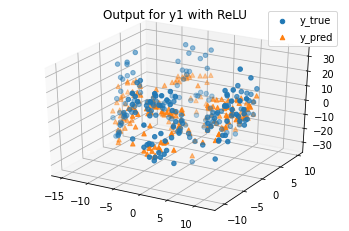

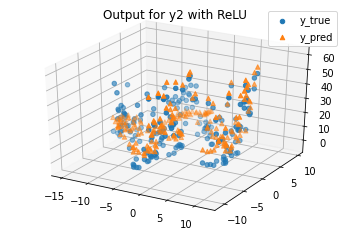

In [ ]:
plot_3d('Output for y1 with ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 with ReLU', X, y_true[:,1], y_pred[:,1])

# Training the Neural Network model without ReLU activation function

In [ ]:
model = NeuralNetwork_Model(n_inputs=input, n_hidden=[4, 3], n_outputs=output, activation_func=None)
print('Neural Network Architecture:')
print(model)

Neural Network Architecture:
NeuralNetwork_Model(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=4, bias=True)
    (1): Linear(in_features=4, out_features=3, bias=True)
    (2): Linear(in_features=3, out_features=2, bias=True)
  )
)


In [ ]:
model.fit(X, y_true, lr, epochs)

y_pred = model.forward(X).detach().numpy()
err = mean_squared_error(y_true, y_pred)
print('Final MSE without ReLU: {}'.format(err))

tensor(377.0841, grad_fn=<MseLossBackward>)
tensor(351.8181, grad_fn=<MseLossBackward>)
tensor(324.5058, grad_fn=<MseLossBackward>)
tensor(264.5201, grad_fn=<MseLossBackward>)
tensor(197.5732, grad_fn=<MseLossBackward>)
tensor(208.9388, grad_fn=<MseLossBackward>)
tensor(246.2690, grad_fn=<MseLossBackward>)
tensor(335.2945, grad_fn=<MseLossBackward>)
tensor(318.9386, grad_fn=<MseLossBackward>)
tensor(296.3296, grad_fn=<MseLossBackward>)
tensor(262.3528, grad_fn=<MseLossBackward>)
tensor(219.2439, grad_fn=<MseLossBackward>)
tensor(197.5698, grad_fn=<MseLossBackward>)
tensor(189.0174, grad_fn=<MseLossBackward>)
tensor(185.8600, grad_fn=<MseLossBackward>)
tensor(190.2885, grad_fn=<MseLossBackward>)
tensor(193.7817, grad_fn=<MseLossBackward>)
tensor(221.3221, grad_fn=<MseLossBackward>)
tensor(180.1419, grad_fn=<MseLossBackward>)
tensor(179.1265, grad_fn=<MseLossBackward>)
tensor(178.9847, grad_fn=<MseLossBackward>)
tensor(179.5523, grad_fn=<MseLossBackward>)
tensor(179.6358, grad_fn=<MseLos

From the above, we can see that the error is larger when ReLU activation is not applied.

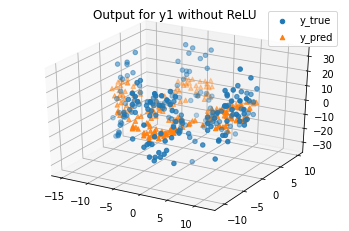

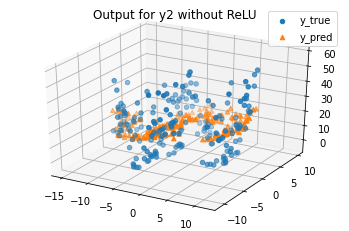

In [ ]:
plot_3d('Output for y1 without ReLU', X, y_true[:,0], y_pred[:,0])
plot_3d('Output for y2 without ReLU', X, y_true[:,1], y_pred[:,1])

## References :

1) Class Slides <br>
2) https://towardsdatascience.com/building-neural-network-from-scratch-9c88535bf8e9 <br>
3) https://www.kdnuggets.com/2019/08/numpy-neural-networks-computational-graphs.html <br>
4) https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html <br>
5) https://towardsdatascience.com/how-to-code-a-simple-neural-network-in-pytorch-for-absolute-beginners-8f5209c50fdd 